### Problem Statement
Key challenge is to weed out insincere questions -- those founded upon false premises, 
or that intend to make a statement rather than look for helpful answers.

#### Rough code 

In [28]:
import pandas as pd
text = pd.read_csv(r"C:\Users\Sayesha\Desktop\Machine Learning\Projects_files\Quora Insincere Questions Classifiaction\train.csv")
import nltk

In [29]:
text.head()

,qid,question_text,target
0,00002165364db923c7e6,How did Quebec nationalists see their province...,0
1,000032939017120e6e44,"Do you have an adopted dog, how would you enco...",0
2,0000412ca6e4628ce2cf,Why does velocity affect time? Does velocity a...,0
3,000042bf85aa498cd78e,How did Otto von Guericke used the Magdeburg h...,0
4,0000455dfa3e01eae3af,Can I convert montra helicon D to a mountain b...,0


#### Cleaning the data

In [30]:
def remove_characters(df,text1):
    df[text1] = df[text1].str.replace(r"http\S+", "")
    df[text1] = df[text1].str.replace(r"http", "")
    df[text1] = df[text1].str.replace(r"@\S+", "")
    df[text1] = df[text1].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]"," ")
    df[text1] = df[text1].str.replace(r"@", "at")
    df[text1] = df[text1].str.lower()
    return df

text_n = remove_characters(text,"question_text")
text_n.head()
print(text.dtypes)
print("\nNumber of nulls :" + str(text["target"].isna().sum()))

qid              object
question_text    object
target            int64
dtype: object

Number of nulls :0


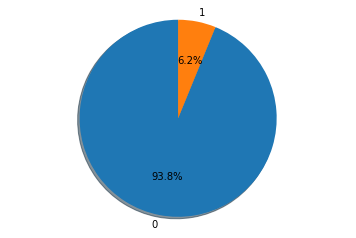

In [31]:
import matplotlib.pyplot as plt
import pandas as pd
labels = text["target"].value_counts().index
fig1, ax1 = plt.subplots()
ax1.pie(text["target"].value_counts().values, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
plt.show()

The corpus is _imbalanced_. There are very few examples of insincere questions.

### Tokenizaton
Converting sentences to list of separate words.

In [32]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

text_n["tokens"] = text_n["question_text"].apply(tokenizer.tokenize)
text_n.head()

,qid,question_text,target,tokens
0,00002165364db923c7e6,how did quebec nationalists see their province...,0,"[how, did, quebec, nationalists, see, their, p..."
1,000032939017120e6e44,"do you have an adopted dog, how would you enco...",0,"[do, you, have, an, adopted, dog, how, would, ..."
2,0000412ca6e4628ce2cf,why does velocity affect time? does velocity a...,0,"[why, does, velocity, affect, time, does, velo..."
3,000042bf85aa498cd78e,how did otto von guericke used the magdeburg h...,0,"[how, did, otto, von, guericke, used, the, mag..."
4,0000455dfa3e01eae3af,can i convert montra helicon d to a mountain b...,0,"[can, i, convert, montra, helicon, d, to, a, m..."


In [33]:
#repeated
all_words = [w for i in text_n["question_text"] for w in i ]
unique_words = set(all_words)
print("Number of unique words"+str(len(unique_words)))

sentence_len = [len(i) for i in text_n["question_text"]]
text_n["token_len"] = sentence_len
print(text_n.head())

Number of unique words47
                    qid                                      question_text  \
0  00002165364db923c7e6  how did quebec nationalists see their province...   
1  000032939017120e6e44  do you have an adopted dog, how would you enco...   
2  0000412ca6e4628ce2cf  why does velocity affect time? does velocity a...   
3  000042bf85aa498cd78e  how did otto von guericke used the magdeburg h...   
4  0000455dfa3e01eae3af  can i convert montra helicon d to a mountain b...   

   target                                             tokens  token_len  
0       0  [how, did, quebec, nationalists, see, their, p...         72  
1       0  [do, you, have, an, adopted, dog, how, would, ...         81  
2       0  [why, does, velocity, affect, time, does, velo...         67  
3       0  [how, did, otto, von, guericke, used, the, mag...         57  
4       0  [can, i, convert, montra, helicon, d, to, a, m...         77  


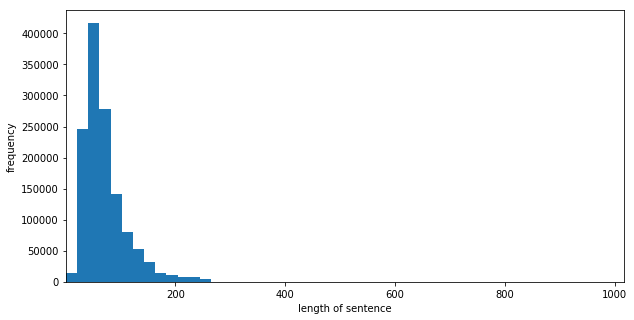

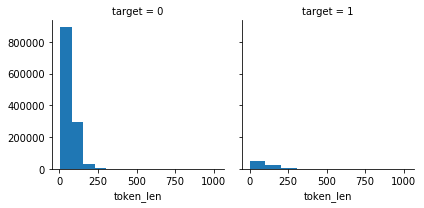

In [34]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.hist(sentence_len,bins= 50)
plt.xlim(min(sentence_len),max(sentence_len))
plt.xlabel('length of sentence')
plt.ylabel('frequency')
plt.show()

import seaborn as sns
g = sns.FacetGrid(text_n,col = "target")
g = g.map(plt.hist,"token_len")
plt.show()

## Embedding
* Bag of Words Count 
Associates an index to each word in our vocabulary, and embeds each sentence as a list of 0s, with a 1 at each index corresponding to a word present in the sentence.

In [35]:
#from sklearn.model_selection import  

* tokenization
* stop words
* lemmatization
* padding
* vectorize
* split-stratified shuffle
* oversampling

### Word Embedding
Vectorization of words using the TF IDF 